## 1.4 필수 라이브러리와 도구들

### 1.4.1 주피터 노트북

### 1.4.2 Numpy
    http://www.numpy.org
    다차원 배열을 위한 기능과 선형 대수 연산과 푸리에 변환 같은 고수준 수학 함수와 유사 난수 생성기를 포함한다.

In [1]:
import numpy as np

x = np.array([[1,2,3],[4,5,6]])
print('x:\n', x)

x:
 [[1 2 3]
 [4 5 6]]


### 1.4.3 SciPy
    https://www.scipy.org/scipylib
    고성능 선형 대수, 함수 최적화, 특수한 수학 함수와 통계 분포 등을 포함한 많은 기능을 제공한다.
    가장 중요한 기능은 scipy.sparse 이다.
    이 모듈은 scikit-learn에서 데이터를 표현하는 또 하나의 방법인 희소 행렬 기능을 제공한다.
    희소 행렬(sparse matrix, 희박 행렬)은 0을 많이 포함한 2차원 배열을 저장할 때 사용한다.

In [2]:
from scipy import sparse

# 대각선 원소는 1이고 나머지는 0인 2차원 numpy 배열을 만든다
eye = np.eye(4)
print('Numpy 배열:\n', eye)

Numpy 배열:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [3]:
# NumPy 배열을 CSR 포맷의 SciPy 희박 행렬로 변환한다.
# 0이 아닌 원소만 저장된다.
sparse_matrix = sparse.csr_matrix(eye)
print('SciPy의 CSR 행렬:\n', sparse_matrix)

SciPy의 CSR 행렬:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


    보통 희소 행렬을 0이 모두 채워진 2차원 배열로부터 만들지 않으므로(메모리가 부족할 수 있어서)
    희소 행렬을 직접 만들 수 있어야 한다.
    COO 포맷을 이용해서 앞서와 동일한 희소 행렬르 만드는 예제이다.

In [6]:
data = np.ones(4)
row_indices = np.arange(4)
col_indicde = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indicde)))
print("COO 표현:\n", eye_coo)

COO 표현:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


### 1.4.4 matplotlib

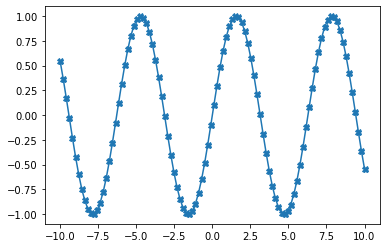

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# -10에서 10까지 100개의 각격으로 나눠어진 배열을 생성한다.
x = np.linspace(-10, 10, 100)
# 사인 함수를 사용하여 y 배열을 생성한다.
y = np.sin(x)

# plot 함수는 한 배열의 값을 다른 배열엘 대응해서 선 그래프를 그린다.
plt.plot(x, y, marker='X')

### 1.4.5 pandas
    전체 배열의 원소가 동일한 타입이어야 하는 NumPy 와는 달리 pandas는 각 열의 타입이 달라도 된다.

In [10]:
import pandas as pd

# 회원 정보가 들어간 데이터셋을 생성한다.
data = {'Name': ['John', 'Anna', 'Peter', 'Linda'],
        'Location': ['New York', 'Paris', 'Berlin', 'London'],
        'Age': [24, 13, 53, 33]}

data_pandas = pd.DataFrame(data)

# 주피터 노트북에서 DataFrame을 미려하게 출력해준다.
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [11]:
# Age 열의 값이 30 이상인 모든 행을 선택한다.
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


### 1.4.5 mglearn
    그래프나 데이터 적재와 관련한 세세한 코드를 일일이 쓰지 않아도 되게끔 이 책을 위해 만든 유틸리티 함수들

## 1.5 파이썬 2 vs. 파이썬 3

## 1.6 이 책에서 사용하는 소프트웨어 버전

In [17]:
import sys

print('Python 버전:', sys.version)

import pandas as pd
print('pandas 버전:', pd.__version__)

import matplotlib
print('matplotlib 버전:', matplotlib.__version__)

import numpy as np
print('NumPy 버전:', np.__version__)

import scipy as sp
print('SciPy 버전:', sp.__version__)

import sklearn
print('scikit-learn 버전:',sklearn.__version__)

Python 버전: 3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]
pandas 버전: 1.1.3
matplotlib 버전: 3.3.2
NumPy 버전: 1.19.2
SciPy 버전: 1.5.2
scikit-learn 버전: 0.23.2


## 1.7 첫 번째 애플리케이션: 붓꽃의 품종 분류
    꽃잎(petal)과 꽃받침(sepal)의 폭과 길이를 센티미터 단위로 측정
    setosa, versicolor, virginica 종으로 분류
    지도학습
    분류 문제(Classification)
    출력될 수 있는 값(붓꽃의 종류)들을 class라고 한다.
    
    데이터 포인트 하나(붓꽃 하나)에 대한 기대 출력은 꽃의 품종이 되며, 이런 특정 데이터 포인트에 대한 출력, 즉 품종을 레이블(label)이라고 한다.